In [57]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
url = "C:/Users/ksmin/data_Science/dataset/bmi_data_phw1.xlsx"

dataset = pd.read_excel(url)

print(dataset.head(10))

      Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  Female   30          63.7902         116.7431    3
1  Female   32          66.7917         125.1554    3
2  Female   27          71.1411         137.1114    3
3    Male   24          66.6432          86.9820    0
4  Female   19          69.4712         138.7444    3
5  Female   35          68.4899          97.8505    0
6  Female   23          65.0693         114.9725    3
7    Male   25          69.1617         120.9844    2
8  Female   29          66.5699         116.7527    3
9  Female   28          66.6841         106.2265    2


In [18]:
print(dataset.describe())
print()
print("dataset Index names, and statistical data")
print(dataset.index)
print(dataset.columns)

              Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955        16.745017    1.036505
min     18.000000        63.125500        83.085300    0.000000
25%     23.750000        66.535825       116.573575    2.000000
50%     28.000000        67.805600       124.675200    3.000000
75%     32.250000        69.064800       134.534375    3.000000
max     35.000000        73.268700       164.586500    4.000000

dataset Index names, and statistical data
RangeIndex(start=0, stop=100, step=1)
Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')


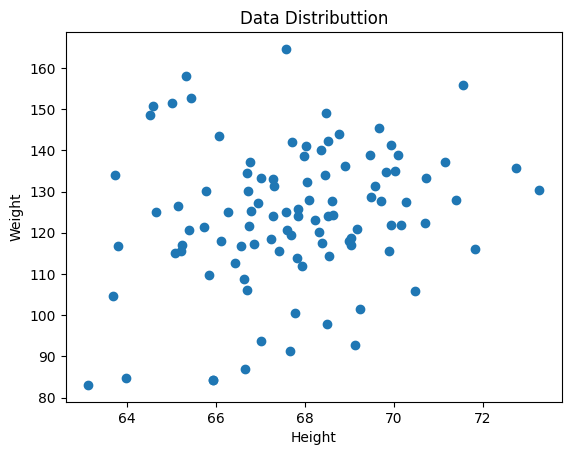

In [22]:
plt.title("Data Distributtion")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(dataset.loc[:,'Height (Inches)'],dataset.loc[:,'Weight (Pounds)'])

plt.show()

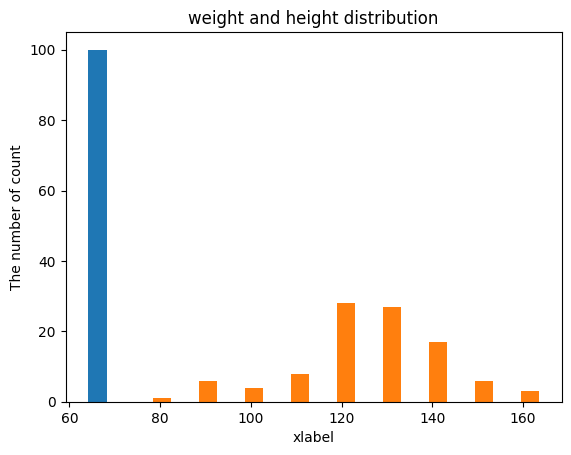

In [39]:
plt.hist(dataset.iloc[:,2:4], bins=10)
plt.title("weight and height distribution")
plt.xlabel("xlabel")
plt.ylabel("The number of count")
plt.show()

   Height (Inches)  Weight (Pounds)
0          63.7902         116.7431
1          66.7917         125.1554
2          71.1411         137.1114
3          66.6432          86.9820
4          69.4712         138.7444
5          68.4899          97.8505
6          65.0693         114.9725
7          69.1617         120.9844
8          66.5699         116.7527
9          66.6841         106.2265
                 Height (Inches)  Weight (Pounds)
Height (Inches)         4.251658         6.757949
Weight (Pounds)         6.757949       280.395588


<Axes: >

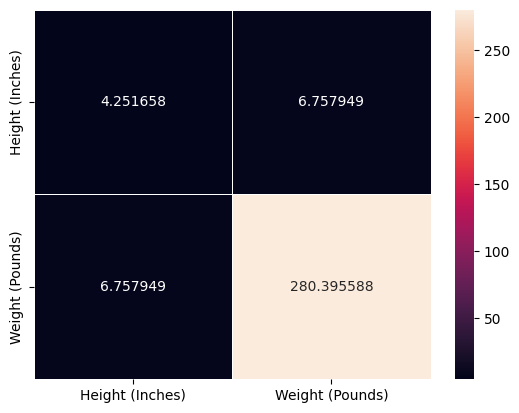

In [40]:
#weight and height covariance. -> positive covariance.
dataset_height_weight = dataset.iloc[:,2:4]
print(dataset_height_weight.head(10))

cov_h_w = pd.DataFrame.cov(dataset_height_weight)
print(cov_h_w)

sns.heatmap(cov_h_w, cbar = True, linewidths=0.5, annot=True, fmt='f')

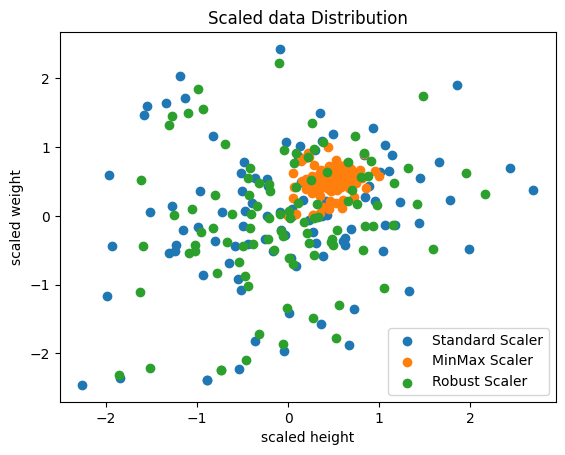

In [44]:
scaler = [("Standard Scaler", StandardScaler()),
          ("MinMax Scaler", MinMaxScaler()),
          ("Robust Scaler", RobustScaler())]

for scaler_name, scaler in scaler:
    scaled_data = scaler.fit_transform(dataset[["Height (Inches)", "Weight (Pounds)"]])
    df_scaled = pd.DataFrame(scaled_data, columns=['Height', 'Weight'])
    plt.scatter(df_scaled['Height'], df_scaled['Weight'], label = scaler_name)

plt.title("Scaled data Distribution")
plt.xlabel("scaled height")
plt.ylabel("scaled weight")
plt.legend()
plt.show()

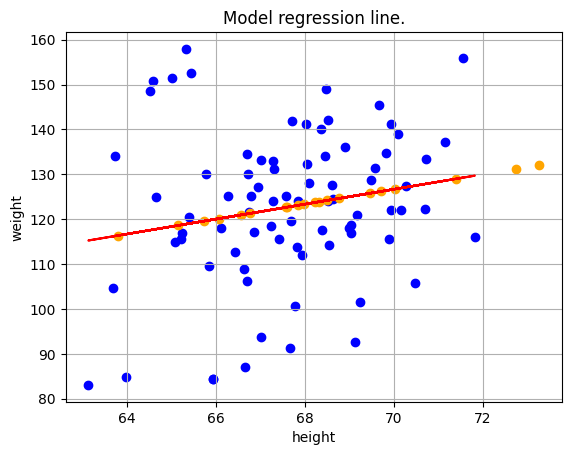

-0.18820700761779996


In [60]:
def Linear_regression(x,y,t_x,t_y):
    model = LinearRegression()
    model.fit(x,y)

    y_pred = model.predict(x)
    y_test = model.predict(t_x)

    plt.scatter(x,y,color ='blue', label ='original data')
    plt.plot(x,y_pred, color='red', label = 'regression line')
    plt.scatter(t_x,y_test, color = 'orange', label = 'Predicted data')

    r2 = r2_score(t_y, y_test)
    
    return model.coef_, model.intercept_, r2

train_X, test_X, train_Y, test_Y = train_test_split(dataset[['Height (Inches)']],dataset[['Weight (Pounds)']],
                                                    test_size = 0.2, random_state=123, shuffle=True)

p_coef, p_intercept,r2_Score = Linear_regression(train_X,train_Y, test_X,test_Y)

plt.title("Model regression line.")
plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

print(r2_Score) #-0.188 weak 음의 r2이기 때문에 모델이 데이터를 설명하는데 효율적이지는 못하다고 판단.